Environment check: Success!
Target Location: Wuhan (Lat: 30.5928, Lon: 114.3055)

Data loaded successfully!
                           temp_air  relative_humidity     ghi     dni  \
time(UTC)                                                                
1990-01-01 00:00:00+00:00     -0.10              58.16  147.35  527.47   
1990-01-01 01:00:00+00:00     -0.08              55.29  256.40  257.33   
1990-01-01 02:00:00+00:00     -0.07              52.43  368.00  303.82   
1990-01-01 03:00:00+00:00     -0.05              49.57  419.90  298.04   
1990-01-01 04:00:00+00:00     -0.04              46.71  453.90  313.31   

                              dhi   IR(h)  wind_speed  wind_direction  \
time(UTC)                                                               
1990-01-01 00:00:00+00:00   85.95  310.48        1.10           282.0   
1990-01-01 01:00:00+00:00  180.80  313.92        1.05           298.0   
1990-01-01 02:00:00+00:00  235.05  317.36        0.99           335.0   
1990-01-

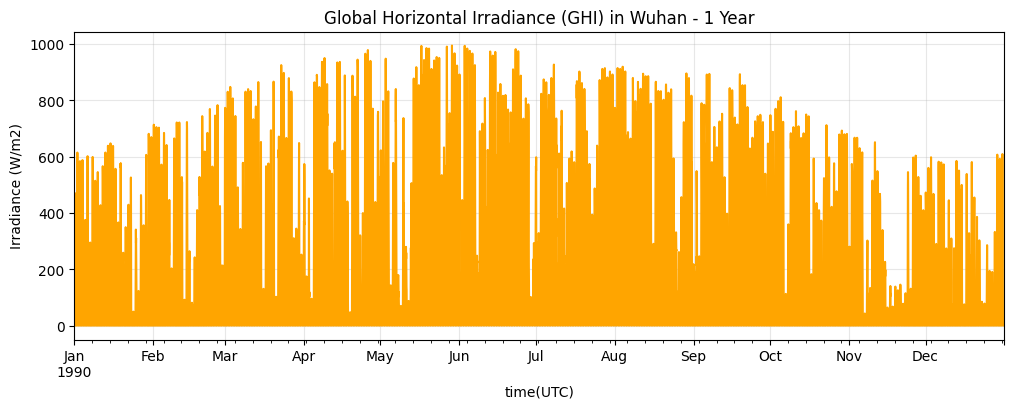

Day 1 Task Completed: Data is ready.


In [2]:
# ==========================================
# Project: Solar Yield Simulator
# Part 1: Weather Data Setup
# Date: 2025-12-25
# Author: Gus Xu
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import pvlib

print("Environment check: Success!")

# 1. Define Location: Wuhan, China
# 刚开始做项目，先把经纬度查好
lat, lon = 30.5928, 114.3055
tz = 'Asia/Shanghai'

# Create location object
# 查了文档，pvlib 需要建立一个 Location 对象
location = pvlib.location.Location(lat, lon, tz=tz, name='Wuhan')
print(f"Target Location: {location.name} (Lat: {lat}, Lon: {lon})")

# 2. Load TMY Data (Typical Meteorological Year)
# 之前已经通过 API 下载好了 csv 文件，现在尝试读取它
# TMY 数据包含了这一年每一小时的辐射量和温度
try:
    weather = pd.read_csv('data/raw/wuhan_tmy.csv', index_col=0, parse_dates=True)
    print("\nData loaded successfully!")
    print(weather.head()) # 打印前5行看看长什么样
except FileNotFoundError:
    print("Error: 找不到 csv 文件，请检查路径。")

# 3. Simple Visualization
# 画一张图来看看武汉的太阳辐射 (GHI - Global Horizontal Irradiance)
# 看看夏天是不是比冬天高
if 'weather' in locals():
    plt.figure(figsize=(12, 4))
    weather['ghi'].plot(color='orange')
    plt.title('Global Horizontal Irradiance (GHI) in Wuhan - 1 Year')
    plt.ylabel('Irradiance (W/m2)')
    plt.grid(True, alpha=0.3)
    plt.show() 
    
    print("Day 1 Task Completed: Data is ready.")